In [63]:
import numpy as np
from openpyxl import load_workbook
import matplotlib.pyplot as plt

btc_workbook = load_workbook('BTC-USD.xlsx')

In [64]:
btc_sheet = btc_workbook.active
closing_values = np.array([])
for value in btc_sheet.iter_rows(min_row=2,
                                min_col=6,
                                max_col=6,
                                values_only=True):
    closing_values = np.append(closing_values, value)

In [65]:
mean_cv = np.sum(closing_values) / closing_values.size
print(f"Mean of the closing values: {mean_cv}")
alpha = closing_values - mean_cv
variance = np.dot(alpha.T, alpha) / closing_values.size
print(f"Variance of the closing values: {variance}")

Mean of the closing values: 17615.18705954322
Variance of the closing values: 279202848.84193856


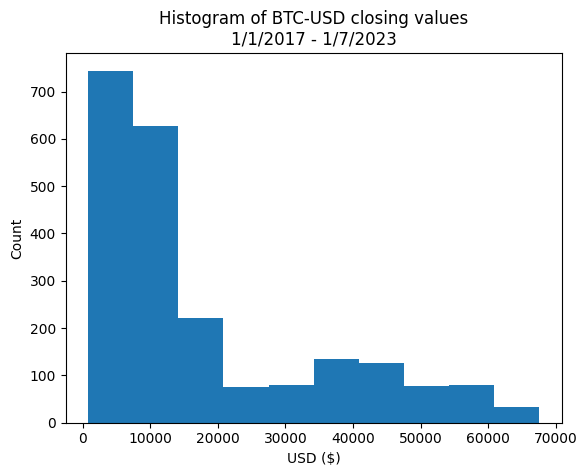

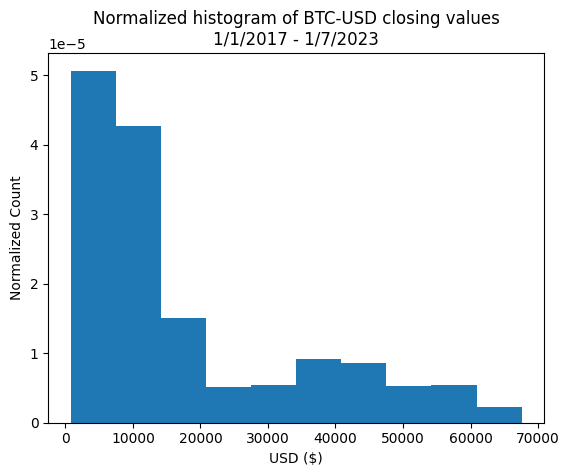

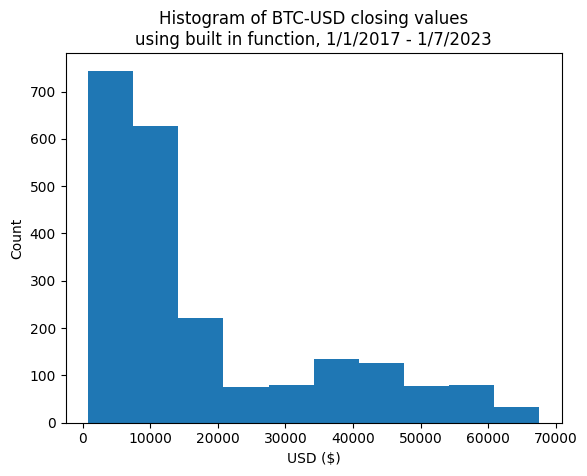

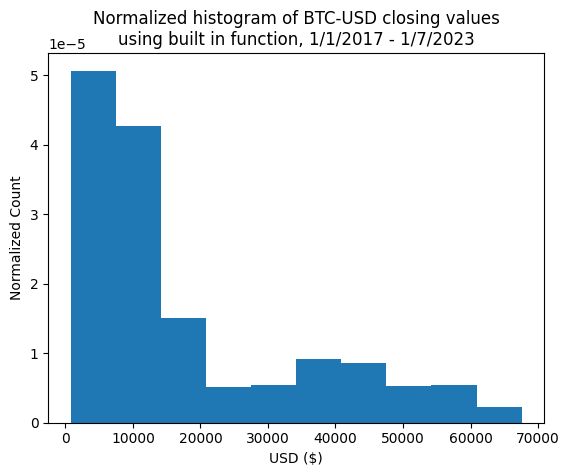

In [66]:
num_bins = 10

counts_cv = np.zeros(num_bins)
bins_cv = np.linspace(np.amin(closing_values), np.amax(closing_values), num_bins+1)
for value in closing_values:
    for i in range(num_bins-1, -1, -1):
        if value >= bins_cv[i]:
            counts_cv[i] += 1
            break

plt.stairs(counts_cv, bins_cv, fill=True)
plt.title("Histogram of BTC-USD closing values\n1/1/2017 - 1/7/2023")
plt.xlabel('USD ($)')
plt.ylabel('Count')
plt.show()

plt.stairs((counts_cv / (np.sum(counts_cv) * np.diff(bins_cv))), bins_cv, fill=True)
plt.title("Normalized histogram of BTC-USD closing values\n1/1/2017 - 1/7/2023")
plt.xlabel('USD ($)')
plt.ylabel('Normalized Count')
plt.show()

# using the built in values
plt.hist(closing_values)
plt.title("Histogram of BTC-USD closing values\nusing built in function, 1/1/2017 - 1/7/2023")
plt.xlabel('USD ($)')
plt.ylabel('Count')
plt.show()

plt.hist(closing_values, density=True)
plt.title("Normalized histogram of BTC-USD closing values\nusing built in function, 1/1/2017 - 1/7/2023")
plt.xlabel('USD ($)')
plt.ylabel('Normalized Count')
plt.show()

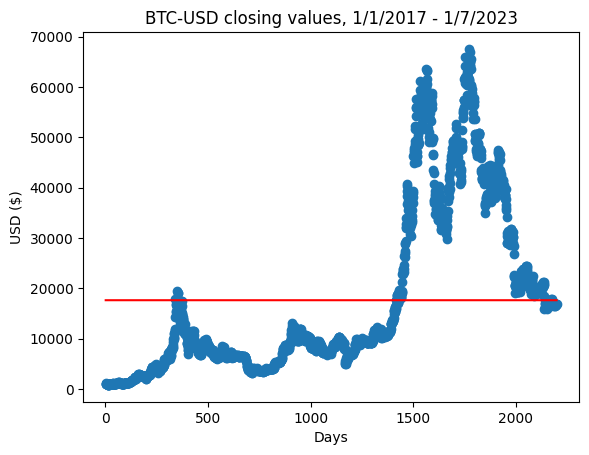

In [67]:
num_days = np.arange(1, closing_values.size + 1)
plt.plot(num_days, closing_values, 'o')
plt.xlabel('Days')
plt.ylabel('USD ($)')
plt.title('BTC-USD closing values, 1/1/2017 - 1/7/2023')
plt.plot(num_days, mean_cv*np.ones((closing_values.size, 1)), 'r')
plt.show()

In [68]:
x = num_days
X_aug = np.stack((x**5, x**4, x**3, x**2, x, np.ones((x.size))), axis=1)
Beta = np.dot(np.dot(np.linalg.inv(np.dot(X_aug.T, X_aug)), X_aug.T), closing_values)

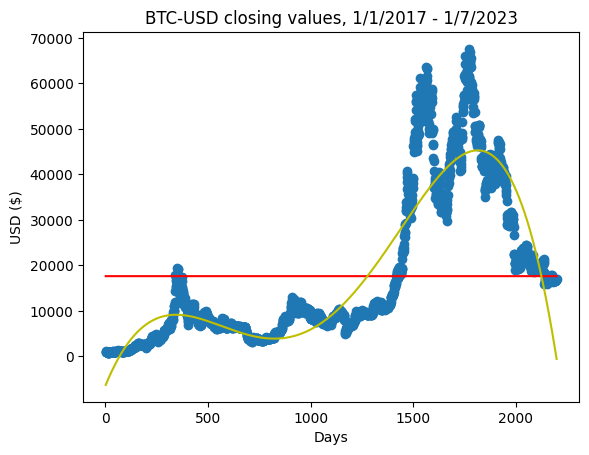

In [69]:
Y_hat = np.dot(X_aug, Beta)
plt.plot(num_days, closing_values, 'o')
plt.xlabel('Days')
plt.ylabel('USD ($)')
plt.title('BTC-USD closing values, 1/1/2017 - 1/7/2023')
plt.plot(num_days, mean_cv*np.ones((closing_values.size, 1)), 'r')
plt.plot(num_days, Y_hat, 'y')
plt.show()

In [70]:
# Feb 15th, 2023 corresponds to day 2237
x_day = 2237
equation_vector = np.array([x_day**5, x_day**4, x_day**3, x_day**2, x_day, 1])
y_hat_cv = np.dot(equation_vector, Beta)
print(f"The predicted closing value of BTC on Feb. 15th, 2023 is: ${np.around(y_hat_cv, decimals=2)}")
print(f"This seems fairly accurate, lol.")

The predicted closing value of BTC on Feb. 15th, 2023 is: $-12599.43
This seems fairly accurate, lol.
